In [123]:
import os
import cv2
import nrrd
import numpy as np
import pandas as pd
from sklearn import preprocessing
from PIL import Image
import matplotlib.pyplot as plt

In [52]:
path="/media/varga-denes/linux-D/RETOUCH_NEW_SPACING/imagesTr/"

In [56]:
for file in os.listdir(path):
    print(file)
    kep=np.load(path+file)
    kep=kep.astype(np.uint8)
    cv2.imshow('kep',kep)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    break

RETOUCH_4194.npy


QObject::moveToThread: Current thread (0x58ce498d2210) is not the object's thread (0x58ce4a0eebd0).
Cannot move to target thread (0x58ce498d2210)

QObject::moveToThread: Current thread (0x58ce498d2210) is not the object's thread (0x58ce4a0eebd0).
Cannot move to target thread (0x58ce498d2210)

QObject::moveToThread: Current thread (0x58ce498d2210) is not the object's thread (0x58ce4a0eebd0).
Cannot move to target thread (0x58ce498d2210)

QObject::moveToThread: Current thread (0x58ce498d2210) is not the object's thread (0x58ce4a0eebd0).
Cannot move to target thread (0x58ce498d2210)

QObject::moveToThread: Current thread (0x58ce498d2210) is not the object's thread (0x58ce4a0eebd0).
Cannot move to target thread (0x58ce498d2210)

QObject::moveToThread: Current thread (0x58ce498d2210) is not the object's thread (0x58ce4a0eebd0).
Cannot move to target thread (0x58ce498d2210)

QObject::moveToThread: Current thread (0x58ce498d2210) is not the object's thread (0x58ce4a0eebd0).
Cannot move to tar

In [57]:
path="/media/varga-denes/linux-D/Dataset001_512x512spacing/imagesTr/"

In [58]:
for file in os.listdir(path):
    print(file)
    readdata, header = nrrd.read(path+file)
    print(readdata.shape)
    kep=readdata[:,:,10]
    kep=kep.astype(np.uint8)
    cv2.imshow('kep',original_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    break

RETOUCH_059_0000.nrrd
(512, 885, 128)


QObject::moveToThread: Current thread (0x58ce498d2210) is not the object's thread (0x58ce4a0eebd0).
Cannot move to target thread (0x58ce498d2210)

QObject::moveToThread: Current thread (0x58ce498d2210) is not the object's thread (0x58ce4a0eebd0).
Cannot move to target thread (0x58ce498d2210)

QObject::moveToThread: Current thread (0x58ce498d2210) is not the object's thread (0x58ce4a0eebd0).
Cannot move to target thread (0x58ce498d2210)

QObject::moveToThread: Current thread (0x58ce498d2210) is not the object's thread (0x58ce4a0eebd0).
Cannot move to target thread (0x58ce498d2210)

QObject::moveToThread: Current thread (0x58ce498d2210) is not the object's thread (0x58ce4a0eebd0).
Cannot move to target thread (0x58ce498d2210)

QObject::moveToThread: Current thread (0x58ce498d2210) is not the object's thread (0x58ce4a0eebd0).
Cannot move to target thread (0x58ce498d2210)

QObject::moveToThread: Current thread (0x58ce498d2210) is not the object's thread (0x58ce4a0eebd0).
Cannot move to tar

In [166]:
import SimpleITK as sitk
import numpy as np
import cv2
'''
This funciton reads a '.mhd' file using SimpleITK and return the image array, origin and spacing of the image.
'''

def load_itk(filename):
    # Reads the image using SimpleITK
    itkimage = sitk.ReadImage(filename)
    #itkimage =np.ndarray(itkimage)
    # Convert the image to a  numpy array first and then shuffle the dimensions to get axis in the order z,y,x
    ct_scan = sitk.GetArrayFromImage(itkimage)

    # Read the origin of the ct_scan, will be used to convert the coordinates from world to voxel and vice versa.
    origin = np.array(list(reversed(itkimage.GetOrigin())))

    # Read the spacing along each dimension
    spacing = np.array(list(reversed(itkimage.GetSpacing())))

    return ct_scan, origin, spacing

In [168]:
scan,origin,spacing=load_itk("/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets/RETOUCH-TrainingSet-Spectralis/TRAIN025/oct.mhd")

In [169]:
scan=scan[0]
scan=cv2.normalize(scan,None, 0, 255, cv2.NORM_MINMAX)
scan=scan.astype(np.uint8)
with open('test.npy', 'wb') as f:
    np.save(f,scan)

In [176]:
training_path="/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets"

In [192]:
npy_path="/media/varga-denes/linux-D/RETOUCH_TRAINING_NPY/"

In [202]:
def in_folders(path,patient_number):
    filename=path+'/oct.mhd'
    itkimage = sitk.ReadImage(filename)
    scan = sitk.GetArrayFromImage(itkimage)
    dir_name=npy_path+str(patient_number)
    os.mkdir(dir_name)
    for index in range(0,scan.shape[0]):
        voxel=scan[index]
        voxel=cv2.normalize(voxel,None, 0, 255, cv2.NORM_MINMAX)
        voxel=voxel.astype(np.uint8)
        save_path=npy_path+str(patient_number)+'/'+str(patient_number)+'_'+str(index)+'.npy'
        with open(save_path, 'wb') as f:
            np.save(f,voxel)
    print(path,patient_number)

In [203]:
for folders in os.listdir(training_path):
    newpath=training_path+'/'+folders
    for in_folder in os.listdir(newpath):
        in_folder_path=newpath+'/'+in_folder
        patient_number=in_folder.replace('TRAIN','')
        in_folders(in_folder_path,patient_number)

/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets/RETOUCH-TrainingSet-Spectralis/TRAIN045 045
/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets/RETOUCH-TrainingSet-Spectralis/TRAIN026 026
/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets/RETOUCH-TrainingSet-Spectralis/TRAIN031 031
/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets/RETOUCH-TrainingSet-Spectralis/TRAIN034 034
/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets/RETOUCH-TrainingSet-Spectralis/TRAIN032 032
/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets/RETOUCH-TrainingSet-Spectralis/TRAIN043 043
/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets/RETOUCH-TrainingSet-Spectralis/TRAIN040 040
/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets/RETOUCH-TrainingSet-Spectralis/TRAIN046 046
/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets/RETOUCH-TrainingSet-Spectralis/TRAIN037 037
/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets/RETOUCH-TrainingSet-Spectralis/TRA

In [29]:
import numpy as np
CIRRUS=[1,24] #24
SPECTRALIS=[25,48] #24
TOPCON=[49,70] #22

In [ ]:
13/4
3.33
1,2,3,4
4,5,6,7
7,8,9,10
10,11,12

In [31]:
def get_fraction(arr,fractions,fraction):
    size=(arr[1]-arr[0])+1
    print(size)
    k=int(np.floor(size/fractions))
    print(k)
    #for i in range(arr[0],arr[1]+1):
    #    print(i)
get_fraction(SPECTRALIS,5,2)

24
4


In [17]:
import os
path="/media/varga-denes/linux-D/RETOUCH_TRAINING_NPY/"
folders={int(folder) for folder in os.listdir(path)}

for folder in folders:
    print(folder)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70


In [30]:
training_path="/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets"

In [31]:
npy_path="/media/varga-denes/linux-D/RETOUCH_TRAINING_NPY/labelsTr/"

In [34]:
import SimpleITK as sitk
import numpy as np
import cv2
import os
def in_folders(path,patient_number):
    filename=path+'/reference.mhd'
    itkimage = sitk.ReadImage(filename)
    scan = sitk.GetArrayFromImage(itkimage)
    dir_name=npy_path+str(patient_number)
    os.mkdir(dir_name)
    for index in range(0,scan.shape[0]):
        voxel=scan[index]
        save_path=npy_path+str(patient_number)+'/'+str(patient_number)+'_'+str(index)+'.npy'
        with open(save_path, 'wb') as f:
            np.save(f,voxel)
    print(path,patient_number)

In [36]:
for folders in os.listdir(training_path):
    newpath=training_path+'/'+folders
    for in_folder in os.listdir(newpath):
        in_folder_path=newpath+'/'+in_folder
        patient_number=in_folder.replace('TRAIN','')
        print(in_folder_path,patient_number)
        in_folders(in_folder_path,patient_number)

/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets/RETOUCH-TrainingSet-Spectralis/TRAIN045 045
/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets/RETOUCH-TrainingSet-Spectralis/TRAIN045 045
/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets/RETOUCH-TrainingSet-Spectralis/TRAIN026 026
/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets/RETOUCH-TrainingSet-Spectralis/TRAIN026 026
/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets/RETOUCH-TrainingSet-Spectralis/TRAIN031 031
/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets/RETOUCH-TrainingSet-Spectralis/TRAIN031 031
/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets/RETOUCH-TrainingSet-Spectralis/TRAIN034 034
/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets/RETOUCH-TrainingSet-Spectralis/TRAIN034 034
/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets/RETOUCH-TrainingSet-Spectralis/TRAIN032 032
/media/varga-denes/linux-D/MICCAI_ORIGINAL/training-sets/RETOUCH-TrainingSet-Spectralis/TRA

In [50]:
import os

image_dir = '/media/varga-denes/linux-D/RETOUCH_TRAINING_NPY/imagesTr'
label_dir = '/media/varga-denes/linux-D/RETOUCH_TRAINING_NPY/labelsTr'

dataset = {'train': [],'validation':[]}

image_paths=[]

def load_paths(path_to_dir):
    paths=[]
    for folder in os.listdir(path_to_dir):
        in_folder_path=path_to_dir+'/'+folder
        for file in os.listdir(in_folder_path):
            file_path=in_folder_path+'/'+file
            paths.append(file_path)
    paths.sort()
    return paths

image_paths=load_paths(image_dir)
label_paths=load_paths(label_dir)

In [51]:
for idx, image_path in enumerate(image_paths):
    label_path = label_paths[idx]
    label=np.load(label_path)
    classes_on_image = (np.unique(label)).tolist()
    dataset_entry = {
        'classes_on_image': classes_on_image,
        'id': idx,
        'image_path': image_path,
        'label_path': label_path
    }
    dataset['train'].append(dataset_entry)

In [52]:
dataset['train'][0]['image_path']

'/media/varga-denes/linux-D/RETOUCH_TRAINING_NPY/imagesTr/001/001_0.npy'

In [25]:
import os
AROI = '/media/varga-denes/linux-D/AROI dataset/imagesTr'
files = os.listdir(AROI)
print(files)

['AROI_008_0000.nrrd', 'AROI_011_0000.nrrd', 'AROI_002_0000.nrrd', 'AROI_007_0000.nrrd', 'AROI_010_0000.nrrd', 'AROI_017_0000.nrrd', 'AROI_019_0000.nrrd', 'AROI_022_0000.nrrd', 'AROI_015_0000.nrrd', 'AROI_001_0000.nrrd', 'AROI_003_0000.nrrd', 'AROI_005_0000.nrrd', 'AROI_020_0000.nrrd', 'AROI_009_0000.nrrd', 'AROI_018_0000.nrrd', 'AROI_004_0000.nrrd', 'AROI_023_0000.nrrd', 'AROI_006_0000.nrrd', 'AROI_012_0000.nrrd', 'AROI_016_0000.nrrd', 'AROI_013_0000.nrrd', 'AROI_024_0000.nrrd', 'AROI_021_0000.nrrd', 'AROI_014_0000.nrrd']


In [60]:
import nrrd
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Add meg a fájl elérési útját
utvonal = AROI + '/' + files[0]

# NRRD fájl beolvasása
def get_data(fajl_utvonal):
    try:
        data, header = nrrd.read(fajl_utvonal)
        #print("NRRD fájl sikeresen beolvasva!")
        #print(f"Adat típusa: {type(data)}")
        #print(f"Array alakja: {data.shape}")
    except Exception as e:
        print("Hiba történt a fájl beolvasása közben:")
        print(e)
    return data

In [27]:
image = data[:,:,0]
print(image.shape)

(512, 1024)


In [38]:
def show_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

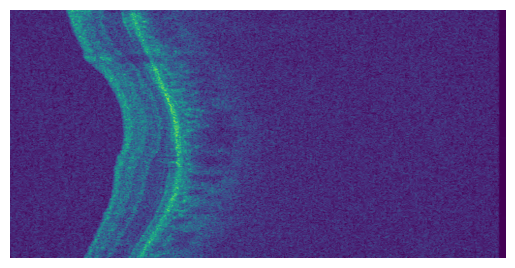

dtype('uint8')

In [64]:
show_image(image)
image.dtype

['AROI_013.nrrd', 'AROI_015.nrrd', 'AROI_003.nrrd', 'AROI_004.nrrd', 'AROI_009.nrrd', 'AROI_023.nrrd', 'AROI_021.nrrd', 'AROI_019.nrrd', 'AROI_024.nrrd', 'AROI_022.nrrd', 'AROI_007.nrrd', 'AROI_017.nrrd', 'AROI_018.nrrd', 'AROI_002.nrrd', 'AROI_012.nrrd', 'AROI_001.nrrd', 'AROI_010.nrrd', 'AROI_006.nrrd', 'AROI_005.nrrd', 'AROI_014.nrrd', 'AROI_016.nrrd', 'AROI_020.nrrd', 'AROI_011.nrrd', 'AROI_008.nrrd']
NRRD fájl sikeresen beolvasva!
Adat típusa: <class 'numpy.ndarray'>
Array alakja: (512, 1024, 30)


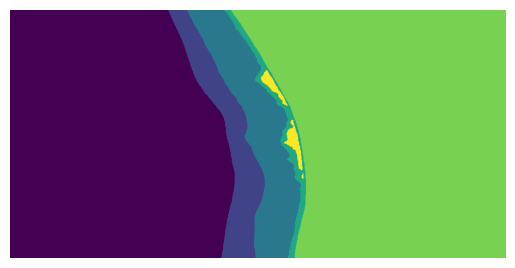

In [39]:
AROI_labels = '/media/varga-denes/linux-D/AROI dataset/labelsTr'
labels = os.listdir(AROI_labels)
print(labels)
label_path = AROI_labels + '/' + labels[0]
label = get_data(label_path)
label_image = label[:,:,0]
show_image(label_image)

In [ ]:
#címkék
0,5,6,7
Background,PED,SRF,IRF

In [67]:
def mask_image_by_values(image, allowed_values):
    allowed_values = np.array(allowed_values)
    mask = np.isin(image, allowed_values)
    masked_image = np.where(mask, image, 0)
    return masked_image

In [34]:
allowed=[0,5,6,7]

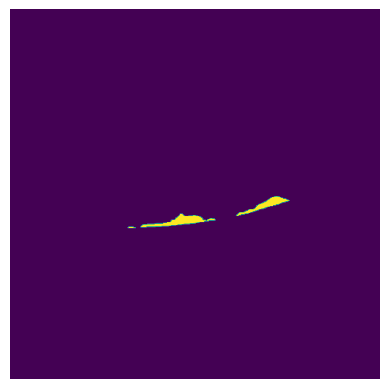

dtype('uint8')

In [73]:
masked = mask_image_by_values(label_image,allowed)
masked = cv2.rotate(masked, cv2.ROTATE_90_CLOCKWISE)
masked = cv2.resize(masked,(488,488))
show_image(masked)
masked.dtype

In [95]:
def mask_image_by_values(image, allowed_values):
    allowed_values = np.array(allowed_values)
    mask = np.isin(image, allowed_values)
    masked_image = np.where(mask, image, 0)

    # Értékek cseréje
    masked_image[masked_image == 5] = 3
    masked_image[masked_image == 6] = 2
    masked_image[masked_image == 7] = 1

    return masked_image

In [96]:
folderpath = '/media/varga-denes/linux-D/AROI dataset/labelsTr'
validate_path ='/media/varga-denes/linux-D/AROI_VALIDATE/labelsTr/'
allowed=[0,5,6,7]
files = os.listdir(folderpath)
files.sort()
for i,file in enumerate(files):
    j=i+1
    utvonal= folderpath + '/' + file
    print(j,utvonal)
    data = get_data(utvonal)
    new_folder = validate_path + str(j)
    os.mkdir(new_folder)
    data = get_data(utvonal)
    slice_dimension= data.shape[2]
    for slice in range(slice_dimension):
        szelet = data[:,:,slice]
        #label esetén más
        szelet = cv2.rotate(szelet, cv2.ROTATE_90_CLOCKWISE)
        szelet = mask_image_by_values(szelet,allowed)
        save_path=new_folder+'/'+str(j)+'_'+str(slice)+'.npy'
        with open(save_path, 'wb') as f:
            np.save(f,szelet)

1 /media/varga-denes/linux-D/AROI dataset/labelsTr/AROI_001.nrrd
2 /media/varga-denes/linux-D/AROI dataset/labelsTr/AROI_002.nrrd
3 /media/varga-denes/linux-D/AROI dataset/labelsTr/AROI_003.nrrd
4 /media/varga-denes/linux-D/AROI dataset/labelsTr/AROI_004.nrrd
5 /media/varga-denes/linux-D/AROI dataset/labelsTr/AROI_005.nrrd
6 /media/varga-denes/linux-D/AROI dataset/labelsTr/AROI_006.nrrd
7 /media/varga-denes/linux-D/AROI dataset/labelsTr/AROI_007.nrrd
8 /media/varga-denes/linux-D/AROI dataset/labelsTr/AROI_008.nrrd
9 /media/varga-denes/linux-D/AROI dataset/labelsTr/AROI_009.nrrd
10 /media/varga-denes/linux-D/AROI dataset/labelsTr/AROI_010.nrrd
11 /media/varga-denes/linux-D/AROI dataset/labelsTr/AROI_011.nrrd
12 /media/varga-denes/linux-D/AROI dataset/labelsTr/AROI_012.nrrd
13 /media/varga-denes/linux-D/AROI dataset/labelsTr/AROI_013.nrrd
14 /media/varga-denes/linux-D/AROI dataset/labelsTr/AROI_014.nrrd
15 /media/varga-denes/linux-D/AROI dataset/labelsTr/AROI_015.nrrd
16 /media/varga-den

In [91]:
import sys
import os
import numpy as np
from cross_val_utils import get_train_and_val_folders

def load_paths(path_to_dir):
    paths=[]
    for folder in os.listdir(path_to_dir):
        in_folder_path=path_to_dir+'/'+folder
        for file in os.listdir(in_folder_path):
            file_path=in_folder_path+'/'+file
            paths.append(file_path)
    paths.sort()
    return paths

def load_datasets(my_dataset,image_paths,label_paths):
    
    for idx, image_path in enumerate(image_paths):
        label_path = label_paths[idx]
        label=np.load(label_path)
        classes_on_image = (np.unique(label)).tolist()
        dataset_entry = {
            'classes_on_image': classes_on_image,
            'id': idx,
            'image_path': image_path,
            'label_path': label_path
        }
        
        my_dataset.append(dataset_entry)
        
def load_val(image_dir,label_dir):
    dataset = {'validation':[]}
    
    val_image_paths=load_paths(image_dir)
    val_label_paths=load_paths(label_dir)

    load_datasets(dataset['validation'],val_image_paths,val_label_paths)

    return dataset


In [93]:
image_dir = '/media/varga-denes/linux-D/AROI_VALIDATE/imagesTr'
label_dir = '/media/varga-denes/linux-D/AROI_VALIDATE/labelsTr'
dataset = load_val(image_dir,label_dir)

In [99]:
files=0
for folders in os.listdir(image_dir):
    newpath=image_dir+'/'+folders
    folders=os.listdir(newpath)
    files+=len(folders)

In [100]:
files

1136